# Exploratory Data Analysis (EDA) on Houses Prices in  Ames, Iowa 
## by Yuxiang Wu

## Preliminary Wrangling

The purpose of this project is to practise my dataset exploration skills by using Python. Thus, I will perform an exploratory data analysis (EDA) on a dataset that contains information of 1460 houses with 81 variables on each home, including neighbourhoods, living areas, building types, lot size, and many others. The original dataset was downloaded from a Kaggle competition, which was to challenge participants to predict the final price of each home in Ames, Iowa. The complete downloaded file contains two sets of data for testing and training, respectively. The dataset I will be working on is the one for training, as it includes the sale price for each house.
<br>
To do preliminary wrangling, I will inspect the data structure, select the variables in the dataset that will help support the investigation, and create new variables if necessary.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as plo

%matplotlib inline

In [3]:
# expand maximun number of columns and row dosplayed
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
# load in the dataset into a pandas dataframe
df_house = pd.read_csv('train.csv')

In [5]:
# view data shape and composition at a high level
print('Rows and columns: ' + str(df_house.shape))
print('')
print(df_house.dtypes)

Rows and columns: (1460, 81)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        i

### The structure of the dataset

The dataset contains 1460 rows (houses) with 81 columns (variables) on each home. Most variables are objects (strings), some variables are integers, and the others are floats.

### Main features of interest in the dataset

The information from the massive dataset allows me to take a more in-depth look at the factors that affect a house's sale price. For building a house price prediction model, it is critical to observe what makes a house expensive and what makes it inexpensive. Although I will only perform an EDA on the training dataset for this project, the result of the analysis will be useful for building a prediction model in the future.

### Features in the dataset that will help support the investigation

From the 81 variables, I expect the factors that influence the house price and, therefore, of most interest are:
- Neighbourhood: Physical locations within Ames city limits
- YearBuilt: Original construction date
- SalePrice: Sale price
- GrLivArea: Above grade (ground) living area in square feet
- BldgType: Type of dwelling
- FullBath: Full bathrooms above grade
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
- LotArea: Lot size in square feet
- GarageType: Garage location
- TotalBsmtSF: Total square feet of the basement area
- OverallCond: Rates the overall condition of the house
- MSZoning: The general zoning classification of the sale

In [6]:
# include all variables that are needed in the investigation in the clean copy
df_house = df_house [['Id',
                      'Neighborhood',
                      'YearBuilt',
                      'SalePrice',
                      'GrLivArea', 
                      'BldgType', 
                      'FullBath',
                      'BedroomAbvGr',
                      'LotArea',
                      'GarageType',
                      'TotalBsmtSF',
                      'OverallCond', 
                      'MSZoning']]

# give meaningful names to all the variables
df_house.rename(columns = {'Id': 'id',
                           'Neighborhood': 'neighborhood',
                           'YearBuilt': 'year_built',
                           'SalePrice': 'sale_price',
                           'GrLivArea': 'total_living_area', 
                           'BldgType': 'bldg_type', 
                           'FullBath': 'full_baths', 
                           'BedroomAbvGr': 'bedrooms',
                           'LotArea': 'lot_area',
                           'GarageType': 'garage_type',
                           'TotalBsmtSF': 'bsmt_area',
                           'OverallCond': 'house_condition',
                           'MSZoning': 'zone'}, inplace=True)

In [7]:
# take a look at the new dataset
df_house.sample(3)

,id,neighborhood,year_built,sale_price,total_living_area,bldg_type,full_baths,bedrooms,lot_area,garage_type,bsmt_area,house_condition,zone
111,112,Gilbert,2000,180000,1430,1Fam,2,3,7750,BuiltIn,384,5,RL
1280,1281,CollgCr,2002,227000,1573,1Fam,2,3,9808,Attchd,1573,5,RL
5,6,Mitchel,1993,143000,1362,1Fam,1,1,14115,Attchd,796,5,RL


In [8]:
# check duplicated observations for each variable 
df_house.apply(lambda x: x.duplicated()).sum()

id                      0
neighborhood         1435
year_built           1348
sale_price            797
total_living_area     599
bldg_type            1455
full_baths           1456
bedrooms             1452
lot_area              387
garage_type          1453
bsmt_area             739
house_condition      1451
zone                 1455
dtype: int64

There is no duplicated id, and duplicate entries in other variables make sense

In [9]:
# check null values in each variable
df_house.isnull().sum()

id                    0
neighborhood          0
year_built            0
sale_price            0
total_living_area     0
bldg_type             0
full_baths            0
bedrooms              0
lot_area              0
garage_type          81
bsmt_area             0
house_condition       0
zone                  0
dtype: int64

There are 81 empty entries in the garage type column, which has no benefits for further investigation 

In [10]:
# drop rows with null values
df_house = df_house.dropna()

In [11]:
# check dataset structure
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1379 non-null   int64 
 1   neighborhood       1379 non-null   object
 2   year_built         1379 non-null   int64 
 3   sale_price         1379 non-null   int64 
 4   total_living_area  1379 non-null   int64 
 5   bldg_type          1379 non-null   object
 6   full_baths         1379 non-null   int64 
 7   bedrooms           1379 non-null   int64 
 8   lot_area           1379 non-null   int64 
 9   garage_type        1379 non-null   object
 10  bsmt_area          1379 non-null   int64 
 11  house_condition    1379 non-null   int64 
 12  zone               1379 non-null   object
dtypes: int64(9), object(4)
memory usage: 150.8+ KB


Some variables are in the wrong data type
<br>

When homebuyers are on a tight budget, the decision between lot size and house size reveals their lifestyle. With a more substantial house size, homeowners have more room to relax inside the house. With a larger lot size, people have more place for outdoor entertainment. Thus, I will create a new column for Building Coverage Ratio from the existing variables called 'building_coverage.' Building Coverage Ratio is "the ratio of the Building area divided by the land (site) area. Building area means the floor space of a building when looking down at it from the sky". Since houses above ground are built on top of their basement, I will use the basement area divided by the lot area to calculate the building coverage ratio.
<br>

sources: https://www.realestate-tokyo.com/news/floor-area-ratio-and-building-coverage-ratio/#:~:text=What%20is%20Building%20Coverage%20Ratio,the%20land%20(site)%20area.&text=Depending%20on%20the%20Land%20Use,BCR%20ratio%20in%20the%20zone.

In [12]:
# correct data types for some variables
convert_dict = {'neighborhood': 'category', 
                'bldg_type': 'category', 
                'full_baths': 'category', 
                'bedrooms': 'category', 
                'garage_type': 'category',
                'zone': 'category'}
df_house = df_house.astype(convert_dict)

In [13]:
# create a new column called 'house to lot ratio'
df_house['building_coverage'] = df_house['bsmt_area'] / df_house['lot_area']

In [14]:
# check if the new variable is created successfully
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 1379 non-null   int64   
 1   neighborhood       1379 non-null   category
 2   year_built         1379 non-null   int64   
 3   sale_price         1379 non-null   int64   
 4   total_living_area  1379 non-null   int64   
 5   bldg_type          1379 non-null   category
 6   full_baths         1379 non-null   category
 7   bedrooms           1379 non-null   category
 8   lot_area           1379 non-null   int64   
 9   garage_type        1379 non-null   category
 10  bsmt_area          1379 non-null   int64   
 11  house_condition    1379 non-null   int64   
 12  zone               1379 non-null   category
 13  building_coverage  1379 non-null   float64 
dtypes: category(6), float64(1), int64(7)
memory usage: 107.0 KB


## Univariate Exploration

In this section, I will investigate the distributions of individual variables. If there are particular points or outliers, I will take a more in-depth look to clean things up. In the section, I will look at all the numeric variables first and then the categorical variables.

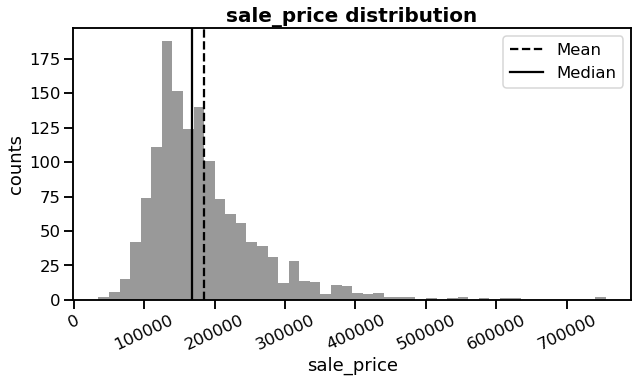

In [15]:
# plot the distribution of sale prices
fig = plt.figure(figsize=(10,5))
sns.set_context('talk')

ax1 = sns.distplot(df_house['sale_price'], hist = True, kde = False, color='black')
mean = df_house['sale_price'].mean()
median = df_house['sale_price'].median()
ax1.axvline(mean, color='black', linestyle='--')
ax1.axvline(median, color='black', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title('sale_price distribution', weight='bold', fontsize=20)
plt.xlabel('sale_price')
plt.ylabel('counts');
plt.xticks(rotation=25);

#### Finding 1
It can be seen that the average price of a house is approximately 180,000, and the median price is slightly less than 200,000. 
<br>
The right-skewed histogram also indicates that there are multiple relatively expensive houses, and the most expensive one is over 700,000. However, I do not consider those costly houses as outliers because each higher price range has a few data points and is not extremely far from the majority of the data.

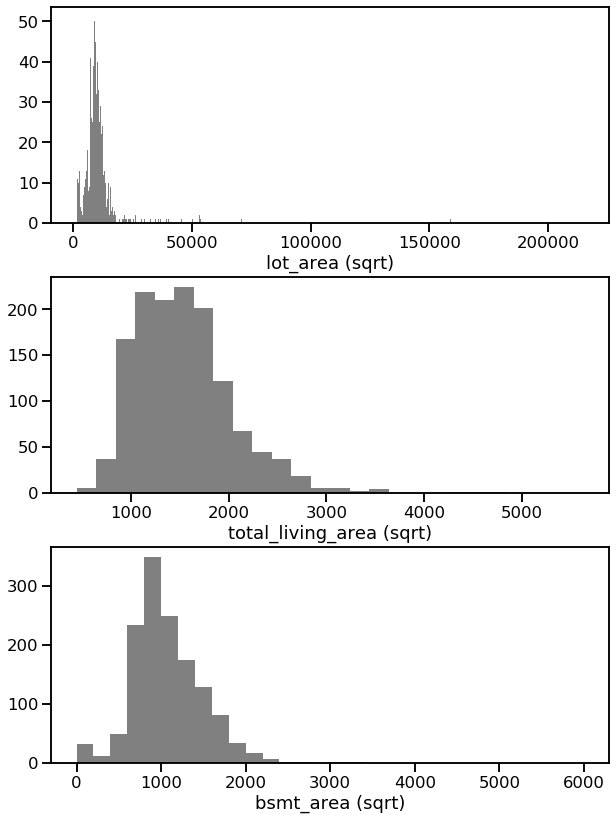

In [16]:
# plot the three variables that regrards to area
fig, ax = plt.subplots(nrows=3, figsize = [10, 12])
plt.subplots_adjust(top = 1, hspace=0.25)
sns.set_context('talk')

variables = ['lot_area', 'total_living_area', 'bsmt_area']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_house[var]), max(df_house[var])+1, 200)
    ax[i].hist(data = df_house, x = var, bins = bins, color = 'grey')
    ax[i].set_xlabel('{} (sqrt)'.format(var))

plt.show()

- The lot area histogram is incredibly right-skewed. Some houses in the dataset are probably farmhouses that have a large lot. Therefore, I will remove the houses with a lot of over 30,000 square feet to get the data to focus on regular homes.
- The total living area histogram shows that there is only one house or two having more than 4,000 square feet total living area. Therefore, I will remove the homes which have a total living area over 4,000 square feet for the same reason above.
- The basement area histogram shows that some houses do not have a basement at all. Thus, I will take a more in-depth look into the basement area data after the outliers mentioned above are removed.

In [17]:
# remove the area outliers
df_house = df_house.drop(df_house[(df_house.lot_area > 30000) | (df_house.total_living_area > 4000)].index)

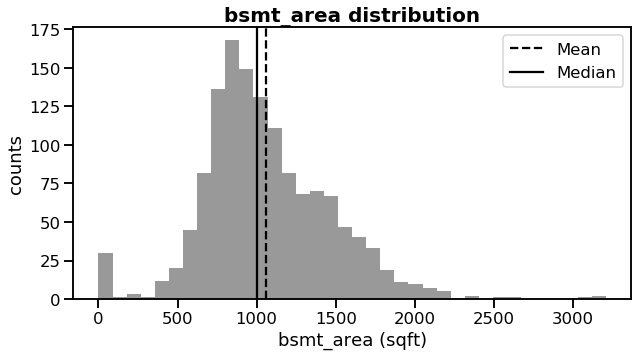

In [18]:
# plot the basement area histogram
fig = plt.figure(figsize=(10,5))
sns.set_context('talk')

ax1 = sns.distplot(df_house['bsmt_area'], hist = True, kde = False, color='black')
mean = df_house['bsmt_area'].mean()
median = df_house['bsmt_area'].median()
ax1.axvline(mean, color='black', linestyle='--')
ax1.axvline(median, color='black', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title('bsmt_area distribution', weight='bold', fontsize=20)
plt.xlabel('bsmt_area (sqft)')
plt.ylabel('counts');

- Over 25 houses do not have a basement. I will take a look at the houses that have basement areas less than 250 square feet.

In [19]:
low_outliers = (df_house['bsmt_area'] < 250)
print(low_outliers.sum())
df_house.loc[low_outliers,:]

32


,id,neighborhood,year_built,sale_price,total_living_area,bldg_type,full_baths,bedrooms,lot_area,garage_type,bsmt_area,house_condition,zone,building_coverage
17,18,Sawyer,1967,90000,1296,Duplex,2,2,10791,CarPort,0,5,RL,0.000000
90,91,NAmes,1950,109900,1040,1Fam,1,2,7200,Detchd,0,5,RL,0.000000
102,103,SawyerW,1979,118964,1535,Duplex,2,4,7018,Attchd,0,5,RL,0.000000
156,157,NAmes,1950,109500,1040,1Fam,1,2,7200,Detchd,0,7,RL,0.000000
182,183,Edwards,1957,120000,1340,1Fam,1,3,9060,Attchd,0,6,RL,0.000000
259,260,OldTown,1956,97000,882,1Fam,1,2,12702,Detchd,0,5,RM,0.000000
342,343,NAmes,1949,87500,1040,Duplex,2,2,8544,Detchd,0,4,RL,0.000000
362,363,Edwards,2003,198500,1922,1Fam,3,4,7301,BuiltIn,0,5,RL,0.000000
371,372,ClearCr,1959,134432,1588,1Fam,2,4,17120,Detchd,0,4,RL,0.000000
392,393,NAmes,1959,106500,882,1Fam,1,3,8339,Attchd,0,7,RL,0.000000


- Although the data for the houses with no or small basement seems reasonable, I will remove the house without basement since the building_coverage is calculated based on the basement area and lot area. (basement area is a better indicator of how much the house occupy the lot than any other variables in the original dataset)

In [20]:
# remove houses without basement
df_house = df_house.drop(df_house[(df_house.bsmt_area == 0)].index)

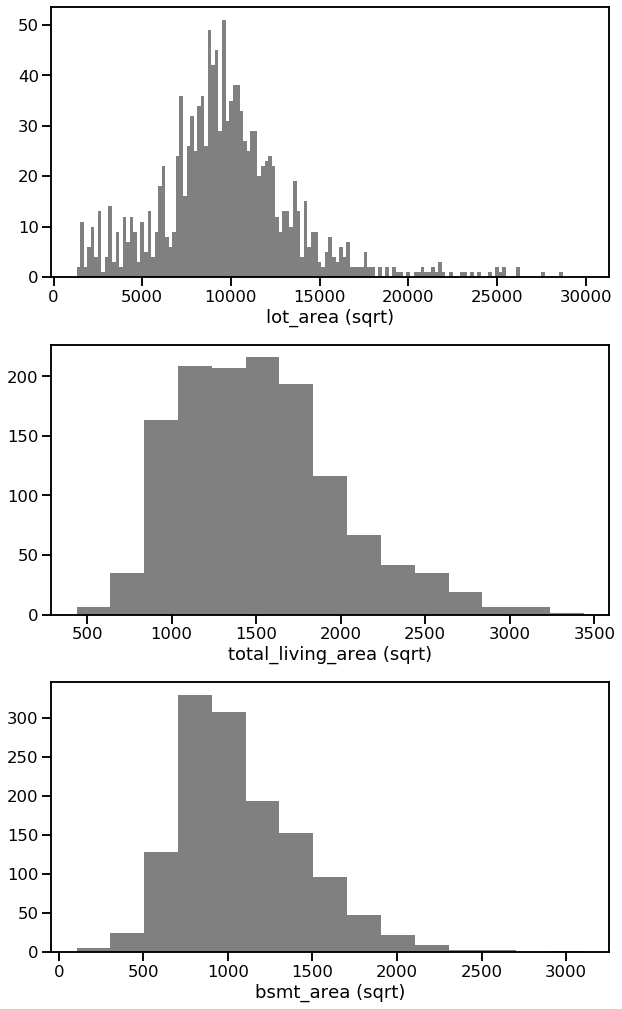

In [21]:
# re-plot the three variables that regrards to area
fig, ax = plt.subplots(nrows=3, figsize = [10, 15])
plt.subplots_adjust(top = 1, hspace=0.25)
sns.set_context('talk')

variables = ['lot_area', 'total_living_area', 'bsmt_area']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_house[var]), max(df_house[var])+1, 200)
    ax[i].hist(data = df_house, x = var, bins = bins, color = 'grey')
    ax[i].set_xlabel('{} (sqrt)'.format(var))

plt.show()

#### Finding 2
The majority of Ames' houses have lot areas in between 5,000 and 15,000 square feet, total living areas in between 600 and 2,250 square feet, and basement areas in between 500 and 2,000 square feet.

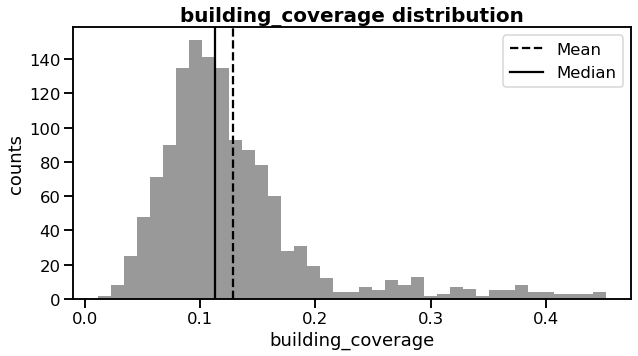

In [22]:
# plot the house to lot ratio histogram
fig = plt.figure(figsize=(10,5))
sns.set_context('talk')

ax1 = sns.distplot(df_house['building_coverage'], hist = True, kde = False, color='black')
mean = df_house['building_coverage'].mean()
median = df_house['building_coverage'].median()
ax1.axvline(mean, color='black', linestyle='--')
ax1.axvline(median, color='black', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title('building_coverage distribution', weight='bold', fontsize=20)
plt.xlabel('building_coverage')
plt.ylabel('counts');

#### Finding 3
It can be seen that the average house is taking slightly over 10% of its lot area, and the median building_coverage ratio is approximately 13%. The right-skewed histogram also indicates that there are a few houses with more substantial building_coverage proportion, and some houses take up almost half of their lot size. 

In [23]:
# now take at the number of unique values for each categorical variables
df_house.select_dtypes(include=['category']).nunique()

neighborhood    25
bldg_type        5
full_baths       4
bedrooms         7
garage_type      6
zone             5
dtype: int64

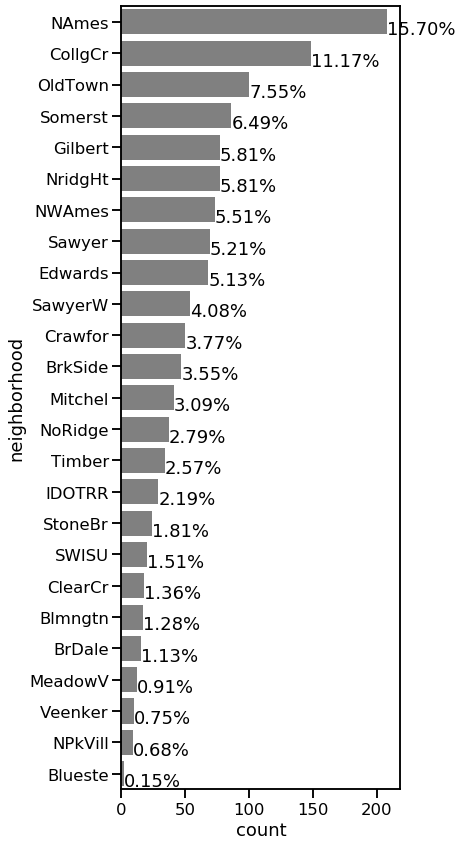

In [24]:
# create a bar chart to see the neighborhood distribution
sns.set_context('talk')
fig = plt.figure(figsize=(5,15))
fig.subplots_adjust(top=0.85, wspace=1)

ax = sns.countplot(data = df_house, y = df_house['neighborhood'], color = 'gray', 
                   order = df_house['neighborhood'].value_counts().index)

total = len(df_house['neighborhood'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
        
#source: https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib

#### Finding 4
Despite 15.7% of the house listings that do not specify their neighbourhoods, the three regions that have the most house information in the dataset are CollgCr (Clear Creek), Old Town, and Somerst (Somerset).

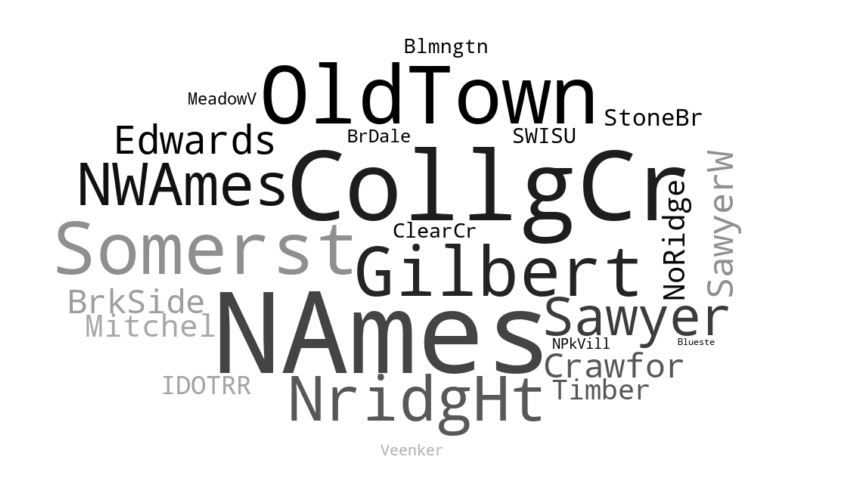

In [25]:
# to make fun, I create a word map to visualize the neighborhoods distribution
neighborhood_count = df_house['neighborhood']
neighborhood_count = neighborhood_count.value_counts()
df_neighborhood = pd.Series.to_frame(neighborhood_count)
df_neighborhood = df_neighborhood.rename_axis('neighborhoods').reset_index()
df_neighborhood.rename(columns={'neighborhood': 'count'}, inplace=True)

d = {}
for a, x in df_neighborhood.values:
    d[a] = x

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
mask = np.array(Image.open("ellipse.png"))
wordcloud_fra = WordCloud(stopwords=stopwords,
                          max_font_size=150,
                          background_color="white", 
                          mode="RGBA", 
                          max_words=1000,
                          mask=mask).generate_from_frequencies(frequencies=d)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors, random_state=1),  interpolation="bilinear")
plt.axis("off")

plt.show()

# source: https://www.datacamp.com/community/tutorials/wordcloud-python
# source: https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python

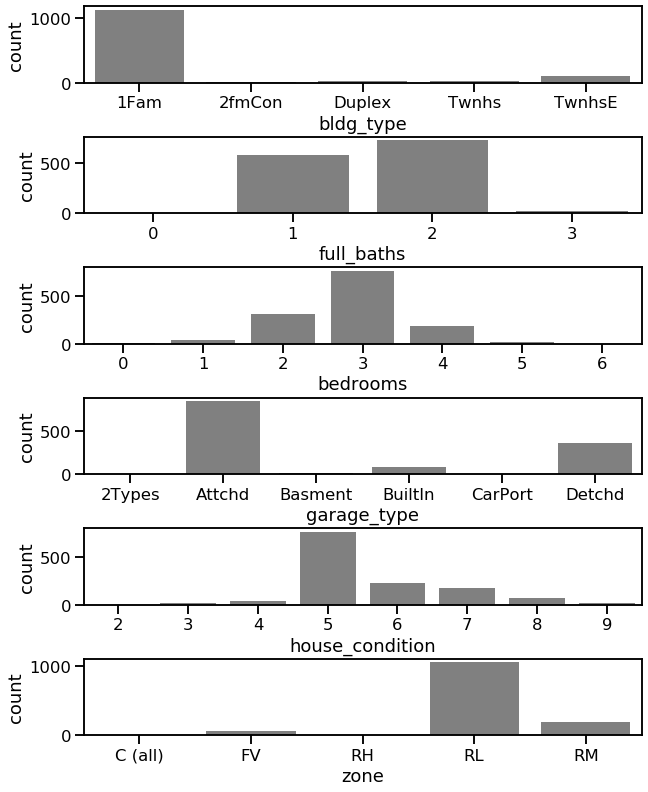

In [26]:
# let's plot all the other five categorical variables to get an idea their distribution.
sns.set_context('talk')
fig, ax = plt.subplots(nrows=6, figsize = [10, 15])
plt.subplots_adjust(top = 0.8, hspace=0.7)

sns.countplot(data = df_house, x = 'bldg_type', color = 'gray', ax = ax[0])
sns.countplot(data = df_house, x = 'full_baths', color = 'gray', ax = ax[1])
sns.countplot(data = df_house, x = 'bedrooms', color = 'gray', ax = ax[2])
sns.countplot(data = df_house, x = 'garage_type', color = 'gray', ax = ax[3])
sns.countplot(data = df_house, x = 'house_condition', color = 'gray', ax = ax[4])
sns.countplot(data = df_house, x = 'zone', color = 'gray', ax = ax[5])

plt.show()

##### Finding 5
- The type of dwelling for most of the houses in the dataset is 1Fam (Single-family Detached)
- Most of the houses in the dataset has 1 or 2 full bathrooms
- The majority of the houses have 3 bedrooms, and a considerable amount of houses have 2 or 4 bedrooms
- The most popular garage types are Attchd (Attached to home) or Detchd (Detached from home)
- Most of the houses receive a house condition rating of 5, and fewer houses have higher ratings
- Most of the houses in the dataset are in the RL (Residential Low Density) zone, and a few houses are in the RM (Residential Medium Density) zone.


Both bedrooms and bathrooms have columns at '0'. Therefore, I will take a look at the values of each variable. 

In [27]:
# count values for each variable
print('building type value counts : \n{}'.format(df_house['bldg_type'].value_counts()))
print('full bath rooms value counts : \n{}'.format(df_house['full_baths'].value_counts()))
print('bedrooms value counts : \n{}'.format(df_house['bedrooms'].value_counts()))
print('garage types value counts : \n{}'.format(df_house['garage_type'].value_counts()))
print('house condition value counts : \n{}'.format(df_house['house_condition'].value_counts()))
print('zone value counts : \n{}'.format(df_house['zone'].value_counts()))

building type value counts : 
1Fam      1127
TwnhsE     113
Twnhs       38
Duplex      28
2fmCon      19
Name: bldg_type, dtype: int64
full bath rooms value counts : 
2    720
1    575
3     23
0      7
Name: full_baths, dtype: int64
bedrooms value counts : 
3    760
2    315
4    182
1     42
5     17
0      5
6      4
Name: bedrooms, dtype: int64
garage types value counts : 
Attchd     843
Detchd     367
BuiltIn     85
Basment     19
CarPort      7
2Types       4
Name: garage_type, dtype: int64
house condition value counts : 
5    765
6    231
7    180
8     67
4     44
9     20
3     15
2      3
Name: house_condition, dtype: int64
zone value counts : 
RL         1050
RM          191
FV           65
RH           11
C (all)       8
Name: zone, dtype: int64


- It can be seen that 7 houses do not have full bathrooms and 5 houses do not have bedrooms above ground. I will remove these houses since they do not belong to conventional house types

In [28]:
# remove the houses that have no full bathrooms or bedrooms 
df_house['full_baths'].replace(0,np.nan, inplace=True)
df_house['bedrooms'].replace(0,np.nan, inplace=True)
df_house = df_house.dropna()

In [29]:
# store the cleaned data
df_house.to_csv('house_cleaned.csv', index=False)

### Univariate Exploration Summary - Discussion of  the distributions of the variables of interest

#### 1. Distributions
- Sale price distribution: the average price of a house is approximately 180,000, and the median price is slightly less than 200,000. The right-skewed histogram also indicates that there are multiple relatively expensive houses, and the most expensive one is over 700,000. However, I do not consider those costly houses as outliers because each higher price range has a few data points, and they are not extremely far away from the majority of the data.
- Three area distributions: the majority of the houses in Ames have lot areas in between 5,000 and 15,000 square feet, total living areas in between 600 and 2,250 square feet, and basement areas in between 500 and 2,000 square feet.
- House to lot ratio distribution: the average house is taking slightly over 10% of its lot area, and the median house to lot ratio is approximately 13%. The right-skewed histogram also indicates that there are a few houses that have a larger house to lot ratio, and some houses take up almost half of their lot size.
- Neighbourhoods distribution: despite 15.7% of the house listings that do not specify their neighbourhoods, the three neighbourhoods with the most house information in the dataset are CollgCr (Clear Creek), Old Town, and Somerst (Somerset).
- Other selected categorical variables distribution: The type of dwelling for most of the houses in the dataset is 1Fam (Single-family Detached). Most of the houses in the dataset have 1 or 2 full bathrooms. The majority of the houses have 3 bedrooms, and a considerable amount of houses have 2 or 4 bedrooms. The most popular garage types are Attchd (Attached to home) or Detchd (Detached from home). Most of the houses receive a house condition rating of 5, and fewer houses have higher ratings. Most of the houses in the dataset are in the RL (Residential Low Density) zone, and a few houses are in the RM (Residential Medium Density) zone.

#### 2. Unusual distributions
- Lot area distribution: a histogram is extremely right-skewed. Some houses in the dataset are probably farmhouses that have a large lot. Therefore, I will remove the houses which have lot area over 30,000 square feet to get the data to focus on regular houses.
- Total living area distribution: there is only one house or two having more than 4,000 square feet total living area. Therefore, I will remove the houses which have a total living area over 4,000 square feet for the same reason above.
- Basement area distribution: some houses do not have a basement at all. Although the data for the houses with no or small basement seems normal, I will remove the house without basement since the house to lot ratio is calculated based on the basement area and lot area. (basement area is a better indicator of how much the house occupy the lot than any other variables in the original dataset)
- 7 houses do not have full bathrooms, and 5 houses do not have a bedroom above ground. I will remove these houses since they do not belong to conventional house types

#### 3. Tidy, adjust, or change the form of the data
- I have deleted 81 empty entries in the garage type column because they have no benefits for further investigation. 
- I have changed the datatypes of following variables from 'object' to 'categorical: 'neighborhood', 'bldg_type', 'full_baths', 'bedrooms', 'garage_type', 'zone'.
- Since I am interested in seeing the relations between the lot area and how much the house is taking up the lot area, I have created a new column from the existing variables called 'house to lot ratio'.


## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the data. Since there are numeric and categorical variables in the dataset, I will plot all the variables into three parts. In part one, I will use correlation plots, scatter plots, and heat map to see the relations among the numeric variables. I will use box plots to understand the relationships between the numeric variables and the categorical variables in part two. Finally, I will use bar charts to see the relations among the categorical variables.

In [29]:
# separate all variables into two groups
numeric_vars = ['sale_price', 
                'total_living_area', 
                'lot_area', 
                'bsmt_area', 
                'building_coverage',
                'year_built']

categoric_vars = ['bldg_type',
                  'full_baths',
                  'bedrooms',
                  'garage_type',
                  'house_condition',
                  'zone']

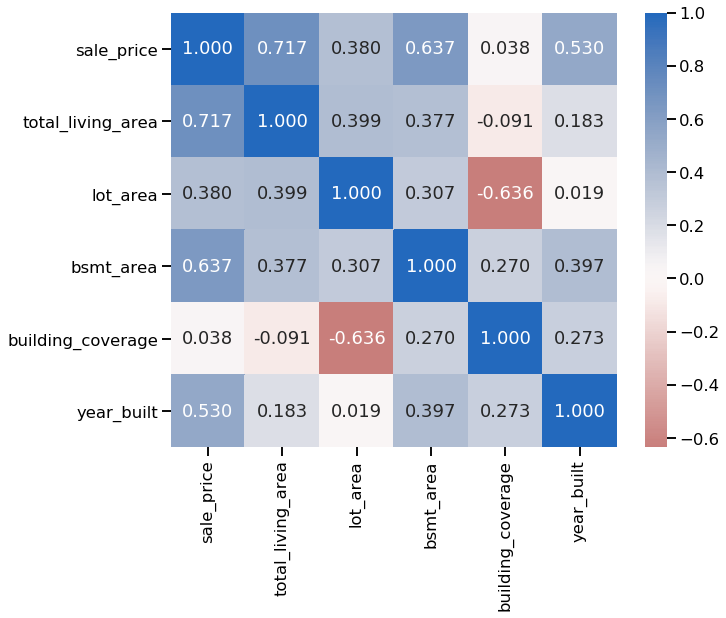

In [30]:
# correlation plot for all numeric variables
sns.set_context('talk')
plt.figure(figsize = [10, 8])
sns.heatmap(df_house[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

- All the correlation coefficients between any two numeric variables are below 0.8. Most of the numeric variables demonstrate a positive correlation, while a negative correlation of -0.636 exists between the building_coverage ratio and lot area. Next, I will select 200 random samples from the dataset and create scatter plots for better visualization for the samples.

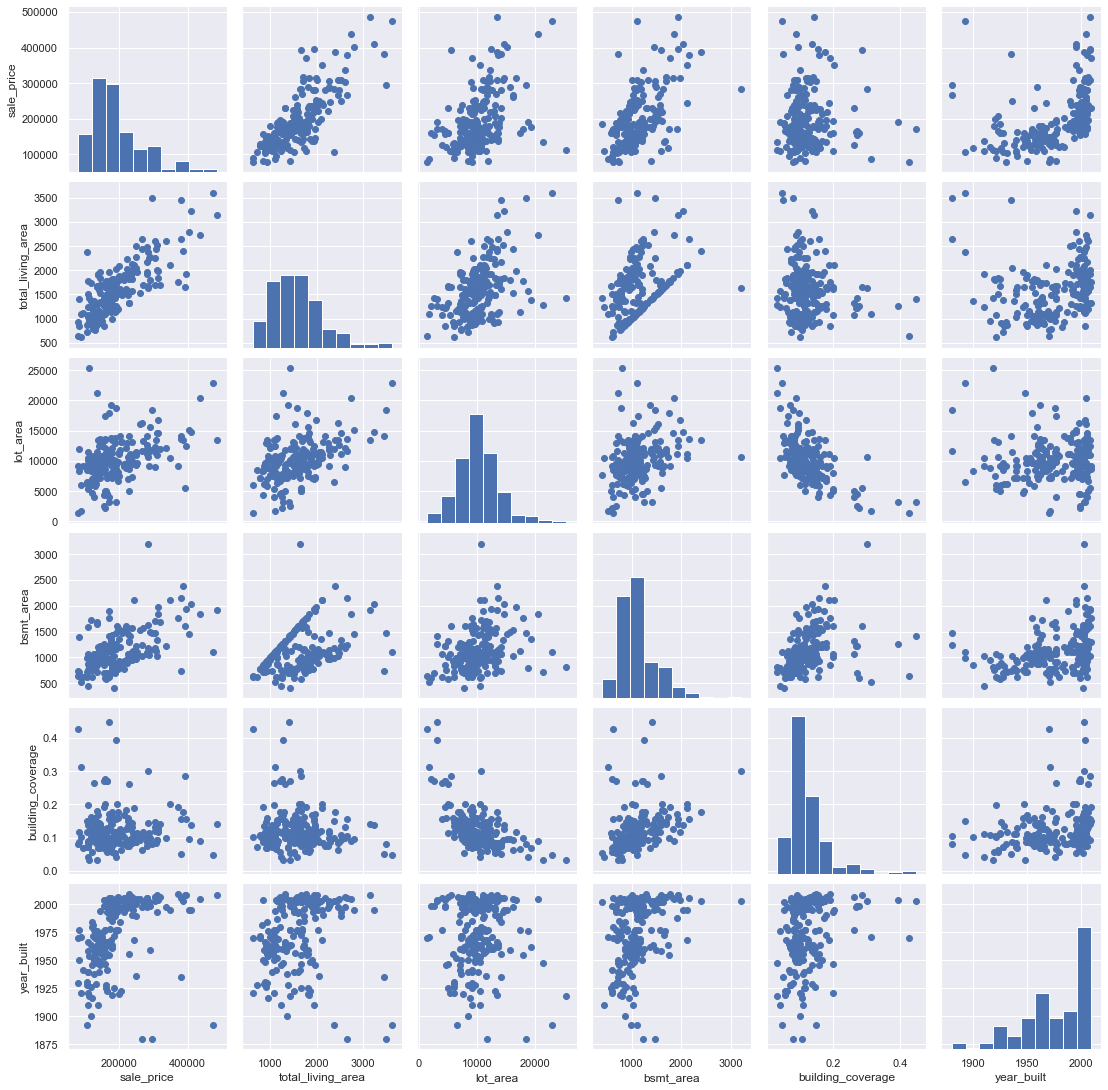

In [31]:
# create scatter plot for all numeric variables
sns.set_context('paper')
sns.set()

samples = df_house.sample(200)

g = sns.PairGrid(data = samples, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter);

- As expected, the 'total living area', 'lot area', and 'basement area' are all correlated to some extent, and all of them are related to the sale price. Since newer houses are more stylish and have better building conditions, it is not surprising that the overall trend between the sale price and year built appears upward.
<br>
Surprisingly, the correlation between building_coverage ratio and lot area is negative, which will be worth further exploration. Other numeric variables do not show strong relationships in the dataset. I won't perform any further analyses with these correlations since they don't look like they'll be of much additional interest.
<br>
Since all the scatters above are randomly selected from the dataset for the ease of running the program, I will plot the variables of interest with the full data to explore the real correlation.

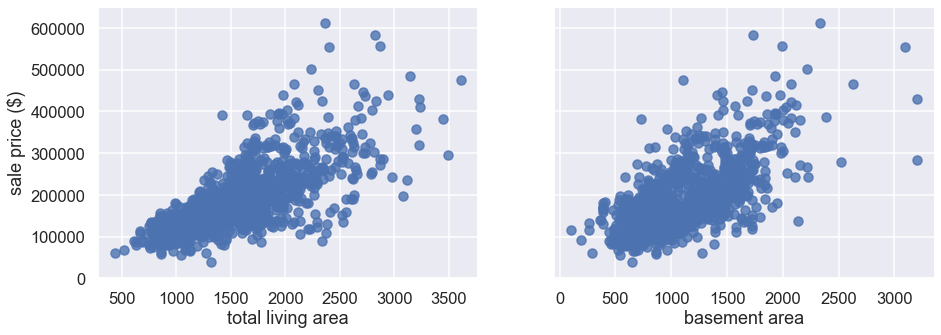

In [32]:
# create scatter plot with dull data for for sale price, total living area, and basement area
sns.set_context('talk')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = [15, 5])
fig.subplots_adjust(top=0.85, wspace=0.4)

ax1.scatter(data = df_house, x = 'total_living_area', y = 'sale_price', alpha = 8/10)
ax1.set(xlabel='total living area', ylabel='sale price ($)')

ax2.scatter(data = df_house, x = 'bsmt_area', y = 'sale_price', alpha = 8/10)
ax2.set(xlabel='basement area')
        
plt.show()

#### Finding 6
The plot suggests that there is a positive correlation between the sale price and total living area, and most houses have listing prices under 300,000 with a total living area of less than 2500 square feet. There is also a positive relationship between the sale price and basement area, and the basement areas of most houses in the City of Ames are between 500 to 2000 square feet.

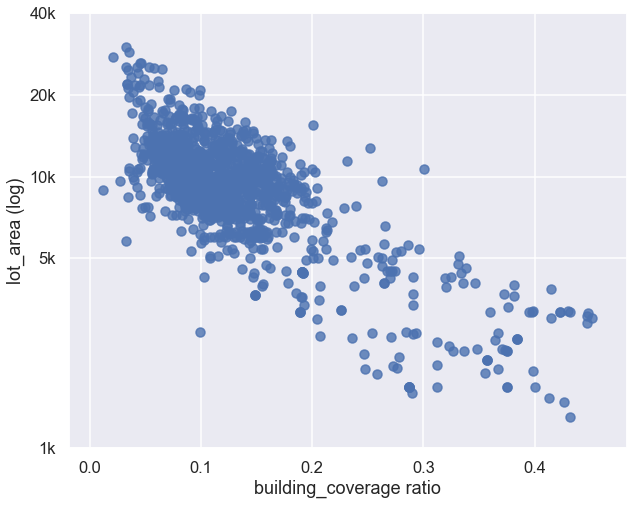

In [33]:
# create scatter plot with dull data for for lot area and house to lot ratio
sns.set_context('talk')
plt.figure(figsize = [10, 8])
plt.scatter(data = df_house, x = 'building_coverage', y = 'lot_area', alpha = 8/10)
plt.xlabel('building_coverage ratio')
plt.yscale('log')
plt.yticks([1e3, 5e3, 1e4, 2e4, 4e4], ['1k', '5k', '10k', '20k', '40k'])
plt.ylabel('lot_area (log)')
plt.show()

#### Finding 7
In general, there is a negative correlation between lot area and building_coverage ratio. The above histograms for areas show that the size of the houses does not vary as much as the size of lots. Thus, the scatter plot of these two variables makes sense. Houses with a larger building coverage ratio usually have a smaller lot. However, lots of the data points stacked together in a concentrated area. To visualize the stacked data points, I will create a heat map.

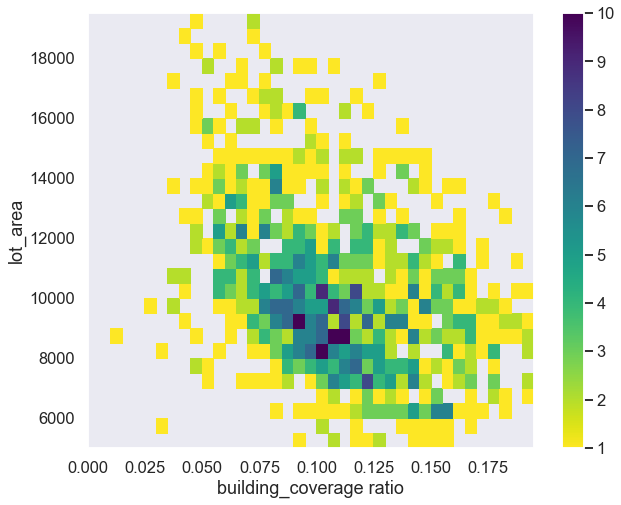

In [35]:
# create a heat map to visualize the stacked data 
sns.set_context('talk')
plt.figure(figsize = [10, 8])

bins_x = np.arange(0, 0.2, 0.005)
bins_y = np.arange(5000, 20000, 500)

plt.hist2d(data = df_house, 
           x = 'building_coverage', 
           y = 'lot_area', 
           bins = [bins_x, bins_y], 
           cmap = 'viridis_r', 
           cmin = 0.5)

plt.colorbar();
plt.xlabel('building_coverage ratio')
plt.ylabel('lot_area');

- The most concentrated data still shows a negative linear relationship between the lot area and building_coverage ratio, which confirms what we found from the above scatter plot.

<Figure size 720x720 with 0 Axes>

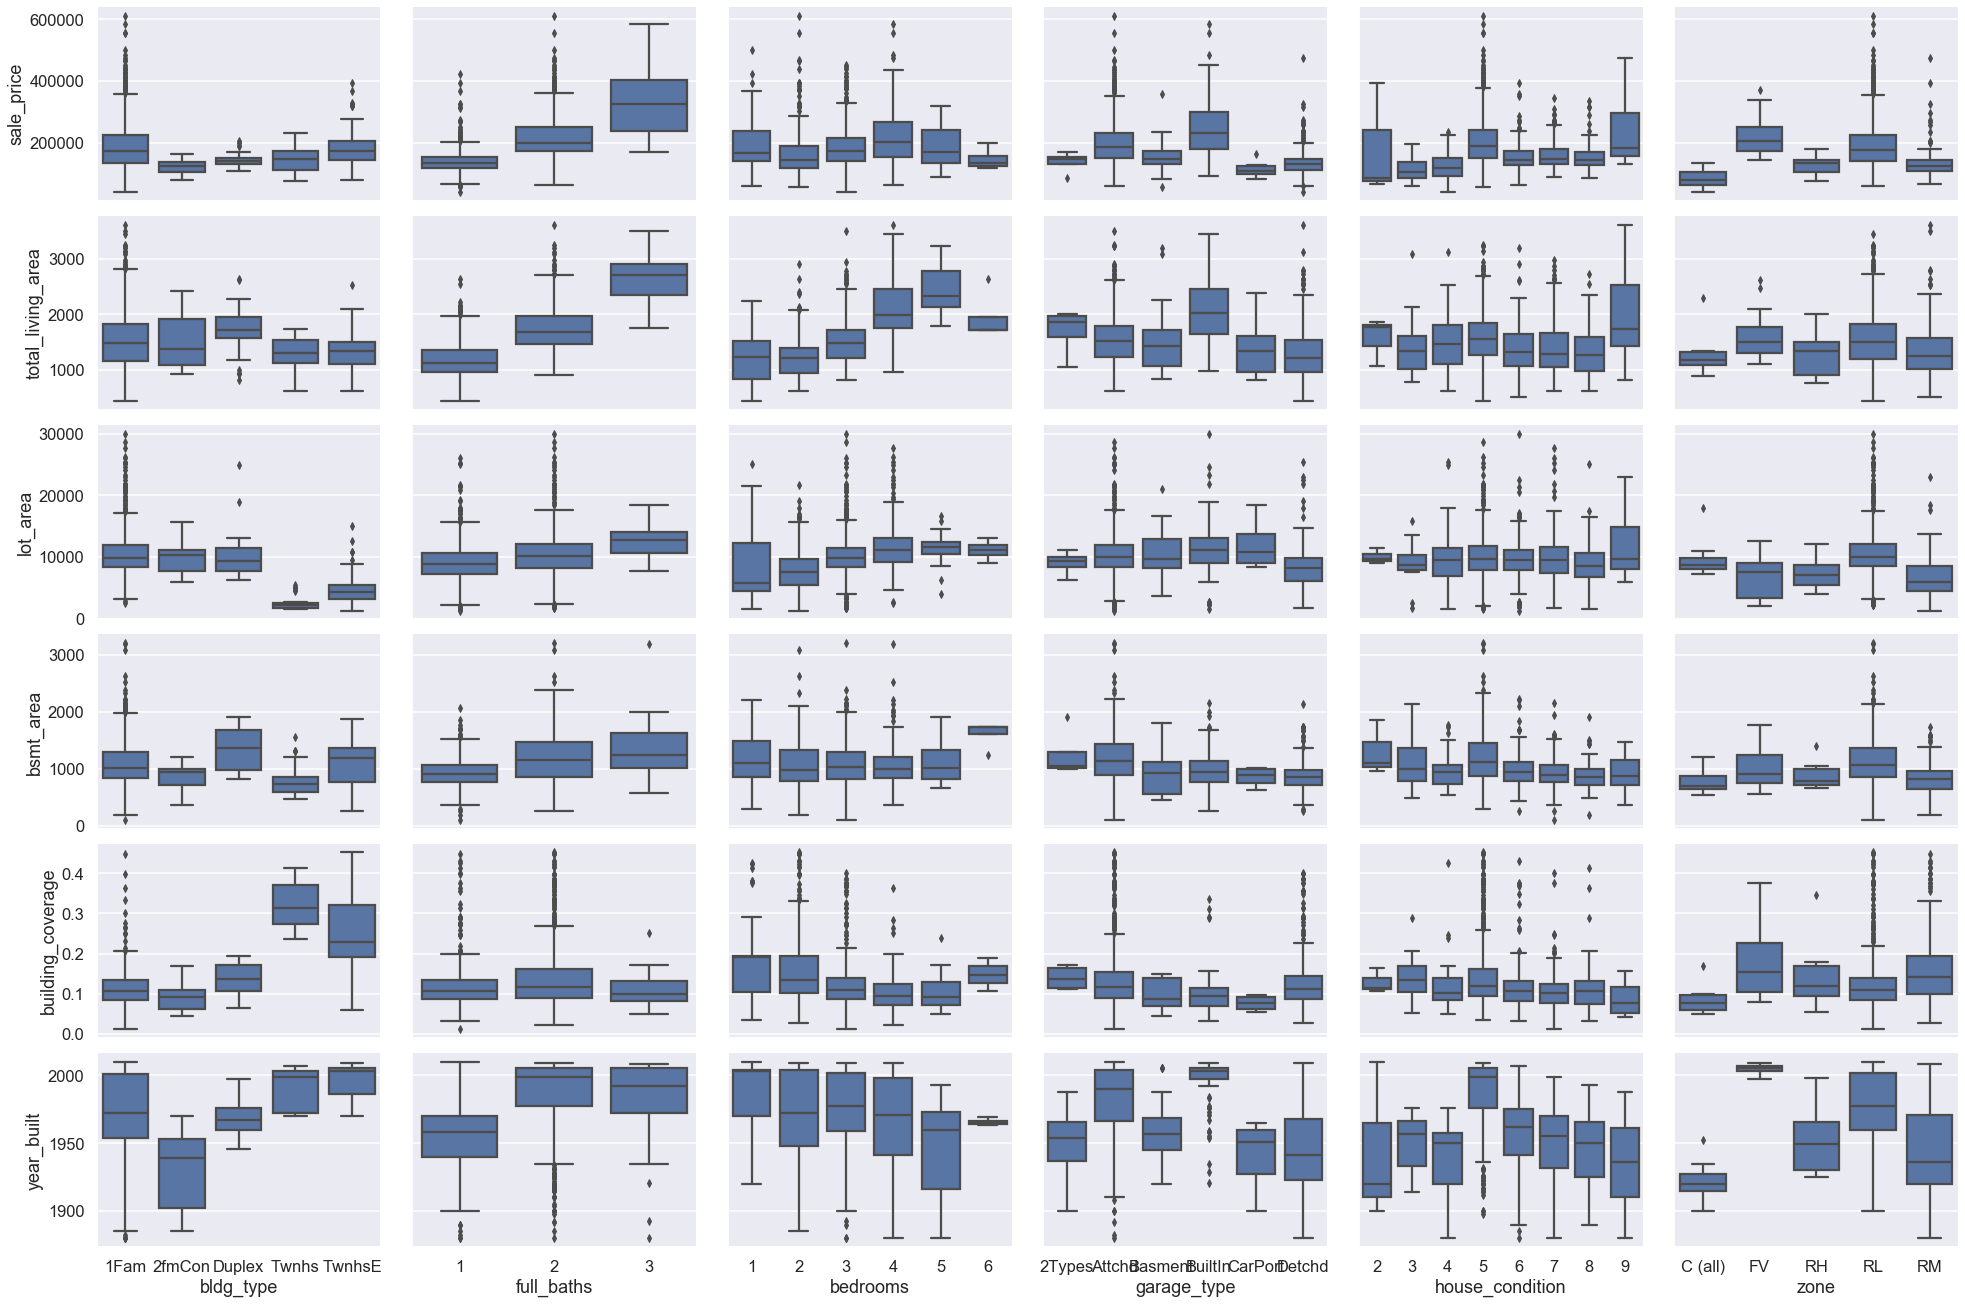

In [36]:
# box plot to see the relations between the numeric variables and the categorical variables.
sns.set_context('talk')
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_house, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

#### Finding 8
Apparently, a house with more full bathrooms comes with a higher price tag. On the other hand, the relation between the sale price and bedrooms is somewhat polynomial, not my expectation.

Next, I will investigate the relationship between the sale price and house condition by plotting the mean sale price and mean house condition ratings in each neighbourhood.

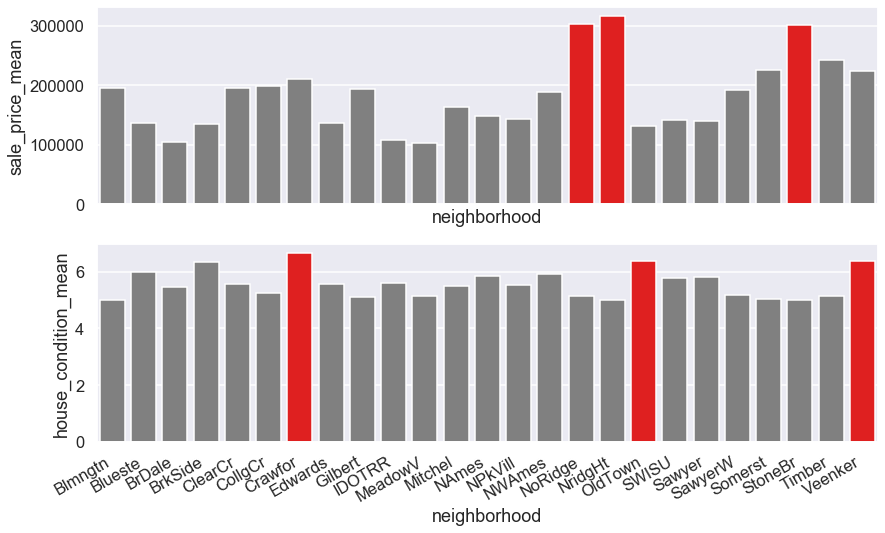

In [37]:
# create a new dataframe for related variables
df_neighbour = df_house [['neighborhood', 'sale_price', 'house_condition']]
df_neighbour = df_neighbour.groupby(['neighborhood']).mean()
df_neighbour = pd.DataFrame({'neighborhood': df_neighbour.index,
                             'sale_price_mean': df_neighbour.sale_price.values,
                             'house_condition_mean': df_neighbour.house_condition.values})

# create two barcharts sharing a same x-axis
f, axarr = plt.subplots(2, sharex=True, figsize = [14, 8])
sns.set_context('talk')

# highlight the neighborhoods with top three sale price
clrs1 = ['grey' if (x < df_neighbour['sale_price_mean'].nlargest(3).iloc[-1]) else 'red' for x in df_neighbour['sale_price_mean'].values ]
ax1 = sns.barplot(x='neighborhood', y='sale_price_mean', data=df_neighbour, palette=clrs1, ax=axarr[0])

# highlight the neighborhoods with top three house condition ratings
clrs2 = ['grey' if (x < df_neighbour['house_condition_mean'].nlargest(3).iloc[-1]) else 'red' for x in df_neighbour['house_condition_mean'].values ]
ax2 = sns.barplot(x='neighborhood', y='house_condition_mean', data=df_neighbour, palette=clrs2, ax=axarr[1])
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment = 'right')

plt.show()

#### Finding 9
Interestingly, the sale price does not associate with house condition ratings. Instead, the three neighbourhoods with the highest sale prices only have an average house condition rating. The three most expensive regions are NoRidge, NridgHt, and StoneBr. The three areas with the highest house condition ratings are Crawfor, OldTown, and Veenker. Next, I will take a more in-depth look at the houses in the three most expensive neighbourhoods.

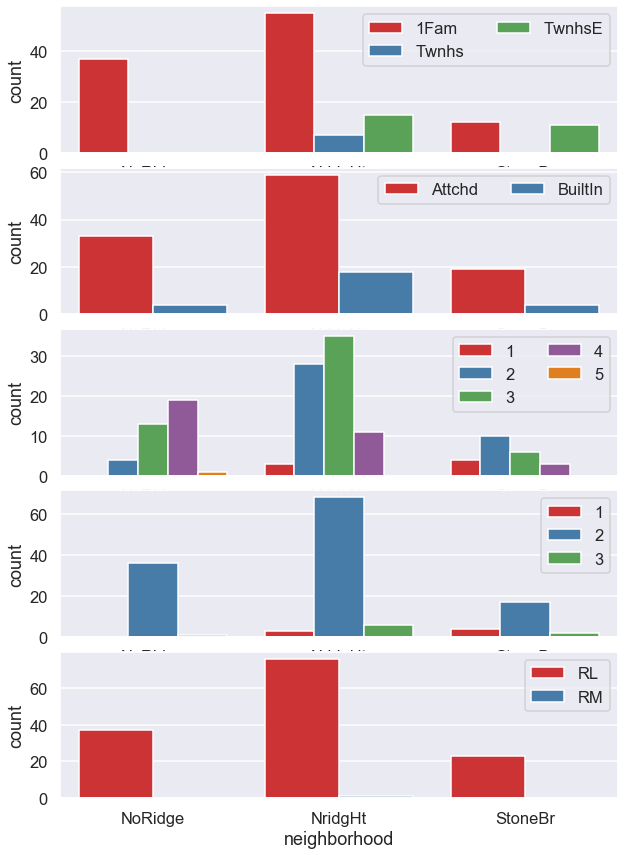

In [38]:
# create a new dataframe for related entries
df_highprice = df_house.loc[(df_house['neighborhood'] == 'NoRidge') | (df_house['neighborhood'] == 'NridgHt') | (df_house['neighborhood'] == 'StoneBr')]

# delete any unsued values in the categorical variables
df_highprice.neighborhood.cat.remove_unused_categories(inplace = True)
df_highprice.bldg_type.cat.remove_unused_categories(inplace = True)
df_highprice.garage_type.cat.remove_unused_categories(inplace = True)
df_highprice.bedrooms.cat.remove_unused_categories(inplace = True)
df_highprice.full_baths.cat.remove_unused_categories(inplace = True)
df_highprice.zone.cat.remove_unused_categories(inplace = True)

# create subplots
sns.set_context('talk')
plt.figure(figsize = [10, 8])
plt.subplots_adjust(top = 1.5, hspace=0.1)

# subplot 1: neighborhood vs building type
ax = plt.subplot(5, 1, 1)
sns.countplot(data = df_highprice, x = 'neighborhood', hue = 'bldg_type', palette = 'Set1')
plt.legend(loc='upper right', ncol = 2)

# subplot 2: neighborhood vs. garage type
ax = plt.subplot(5, 1, 2)
sns.countplot(data = df_highprice, x = 'neighborhood', hue = 'garage_type', palette = 'Set1')
plt.legend(loc='upper right', ncol = 2)

# subplot 3: neighborhood vs. number of bedrooms
ax = plt.subplot(5, 1, 3)
sns.countplot(data = df_highprice, x = 'neighborhood', hue = 'bedrooms', palette = 'Set1')
plt.legend(loc='upper right', ncol = 2)

# subplot 4: neighborhood vs. number of full bathrooms
ax = plt.subplot(5, 1, 4)
sns.countplot(data = df_highprice, x = 'neighborhood', hue = 'full_baths', palette = 'Set1')
plt.legend(loc='upper right', ncol = 1)

# subplot 5: neighborhood vs. zone
ax = plt.subplot(5, 1, 5)
sns.countplot(data = df_highprice, x = 'neighborhood', hue = 'zone', palette = 'Set1')
plt.legend(loc='upper right', ncol = 1)

plt.show()

#### Finding 10
- Most of the houses in the three most expensive neighbourhoods are Single-family Detached, and the rest of dwellings in these neighbourhoods are either TwnhsE (Townhouse End Unit) or Twnhs (Townhouse Inside Unit)
- Most of the houses in the three most expensive neighbourhoods have attached garage, and the others have a built-in garage.
- In NoRidge, most families have 4 bedrooms. In NridgHt, most families have 3 bedrooms. In StoneBr, most families have 2 bedrooms.
- Most of the houses in the three most expensive neighbourhoods have 2 full bathrooms above ground.
- Most of the houses in the three most expensive neighbourhoods are in a RL (Residential Low Density) area, while the others are in a RM (Residential Medium Density) area.

### Bivariate Exploration Summary

### Observed relationships between the variables of interest and sale price in the dataset

- There is a positive correlation between the sale price and total living area, and most houses have listing prices under 300,000 with a total living area of less than 2500 square feet. There is also a positive relationship between the sale price and basement area, and the basement areas of most houses in the City of Ames are between 500 to 2000 square feet.
- Apparently, a house with more full bathrooms comes with a higher price tag. On the other hand, the relation between the sale price and bedrooms is somewhat polynomial, which is not in my expectation.
- Interestingly, the sale price does not associate with house condition ratings. Instead, the three neighbourhoods with the highest sale prices only have an average house condition rating. The three most expensive neighbourhoods are NoRidge, NridgHt, and StoneBr. The three neighbourhoods with the highest house condition ratings are Crawfor, OldTown, and Veenker.

### Interesting relationships between the other variables (not the main feature(s) of interest)

- In general, there is a negative correlation between lot area and building_coverage ratio. The above histograms for areas show that the size of the houses does not vary as much as the size of lots. Thus, the scatter plot of these two variables makes sense. Houses with a larger building coverage ratio usually have a smaller lot. 
- Most of the houses in the three most expensive neighbourhoods are Single-family Detached, and the rest of dwellings in these neighbourhoods are either TwnhsE (Townhouse End Unit) or Twnhs (Townhouse Inside Unit)
- Most of the houses in the three most expensive neighbourhoods have attached garage, and the others have built-in garage.
- In NoRidge, most families have 4 bedrooms. In NridgHt, most families have 3 bedrooms. In StoneBr, most families have 2 bedrooms.
- Most of the houses in the three most expensive neighbourhoods have 2 full bathrooms above ground.
- Most of the houses in the three most expensive neighbourhoods are in a RL (Residential Low Density) area, while the others are in a RM (Residential Medium Density) area.

## Multivariate Exploration

In this section, I would like to view how other variables related to house prices in a bigger picture.

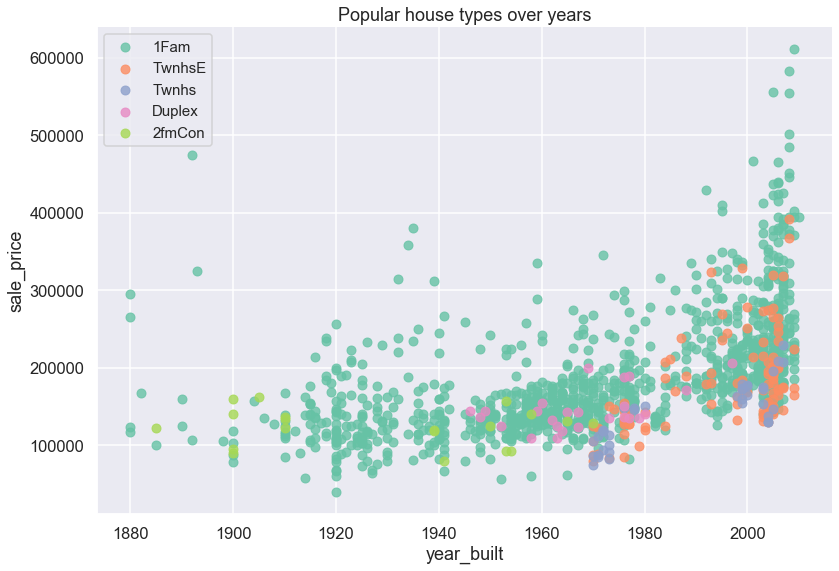

In [39]:
# create a multivariate plot for sale price, year built, and building types 
sns.set_context('talk')
order = df_house['bldg_type'].value_counts().index.tolist()
g = sns.FacetGrid(data = df_house, hue = 'bldg_type', hue_order = order, height = 8, aspect = 1.5, palette="Set2")
g.map(sns.regplot,"year_built", "sale_price", fit_reg = False);
plt.legend(loc=2, fontsize = 15)
plt.title("Popular house types over years");

>Note:
<br>
1Fam: Single-family Detached	
2FmCon: Two-family Conversion; originally built as one-family dwelling
<br>
Duplx: Duplex
<br>
TwnhsE: Townhouse End Unit
<br>
TwnhsI: Townhouse Inside Unit

#### Finding 11
- The most popular dwelling type in the city of Ames is Single-family Detached. Houses with price tags over $300,000 are mostly Single-family Detached.
- The Two-family Conversion type of house disappeared from the market after 1970.
- Duplex became less popular after 1980
- In general, Townhouse End Units are more expensive than Townhouse Inside Units

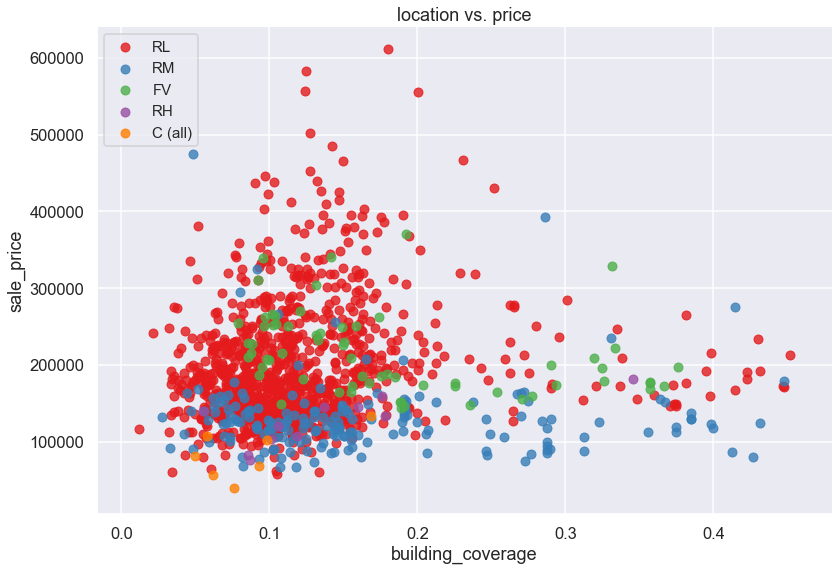

In [42]:
# create a multivariate plot for sale price, building coverage ratio, and zone classification 
sns.set_context('talk')
order = df_house['zone'].value_counts().index.tolist()
g = sns.FacetGrid(data = df_house, hue = 'zone', hue_order = order, height = 8, aspect = 1.5, palette="Set1")
g.map(sns.regplot,"building_coverage", "sale_price", fit_reg = False);
plt.legend(loc=2, fontsize = 15)
plt.title("location vs. price");

>Note:
<br>
C: Commercial
<br>
FV: Floating Village Residential
<br>
RH: Residential High Density
<br>
RL: Residential Low Density
<br>
RM: Residential Medium Density


#### Finding 12 
- Houses located in the residential medium density area are usually sold less expensive than other regions, except for those found in a commercial area.
- Most of the houses in the Ames city are sold below 300,000 and have a building coverage ratio less than 0.2
- Most of the houses are located in a residential low-density area.
- Houses worth more than $300,000 are more likely found in a residential low-density area.